In [ ]:
#matplotlib.pyplot is a state-based interface to matplotlib which provides a␣
# MATLAB-like way of plotting.
#pyplot is mainly intended for interactive plots and simple cases of␣
# programmatic plot generation
#Pandas provides a merge function that will join dataframes on either columns␣
# or indexes.
#Seaborn is a plotting library that offers a simpler interface, sensible␣
# defaults for plots needed for machine learning
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns




In [ ]:
#OS module provides functions for interacting with the operating system
#sys module provides functions and variables used to manipulate different parts␣
# of Python runtime environment.
import sys
import os

In [ ]:
#Sklearn, short for scikit-learn, is a Python library for building machine␣
# learning models.
#decision_tree_classifier build models like the structure of a tree.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [ ]:
#scaling techniques for normalization, this means the training data will be␣
# used to estimate the minimum and maximum observable values.
from sklearn.preprocessing import MinMaxScaler
#decision tree solves both classification and regression problems.
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
#R2 score is a very metric that is used to evaluate the performance of a␣
# regression-based machine learning model.

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')
print(df.columns)
print(df.shape)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')
(500, 9)


In [ ]:
s1= df[df['Chance of Admit ']>0.80]
#s1= df['Chance of Admit ']>0.80
s1.count()

Serial No.           142
GRE Score            142
TOEFL Score          142
University Rating    142
SOP                  142
LOR                  142
CGPA                 142
Research             142
Chance of Admit      142
dtype: int64

In [ ]:
df.loc[df['Chance of Admit '] >= 0.80, 'Chance of Admit '] = 1
df.loc[df['Chance of Admit '] < 0.80, 'Chance of Admit '] = 0
df['Chance of Admit ']

0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
495    1.0
496    1.0
497    1.0
498    0.0
499    1.0
Name: Chance of Admit , Length: 500, dtype: float64

In [ ]:
X = df.drop(['Chance of Admit ','Serial No.'],axis=1)
y = df['Chance of Admit ']

In [ ]:
#In scikit-learn a random split into training and test sets can be quickly␣
# computed with the train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)


In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test,y_pred, labels=[0.0,1.0])
print('Confusion matrix ', matrix)
accuracy1 = accuracy_score(y_test,y_pred)
print('Accuracy1',accuracy1)

Confusion matrix  [[64  1]
 [ 3 32]]
Accuracy1 0.96


In [ ]:
#classification report is used to show the precision, recall, F1 Score, and␣
# support of your trained classification model.
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)


              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        65
         1.0       0.97      0.91      0.94        35

    accuracy                           0.96       100
   macro avg       0.96      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100



In [ ]:
feature_names = df.columns[:10]
print(feature_names)
target_names = df['Chance of Admit '].unique().tolist()

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [ ]:
class_names=[str(x) for x in model.classes_]
print(model.classes_)
print(str(class_names))

[0. 1.]
['0.0', '1.0']


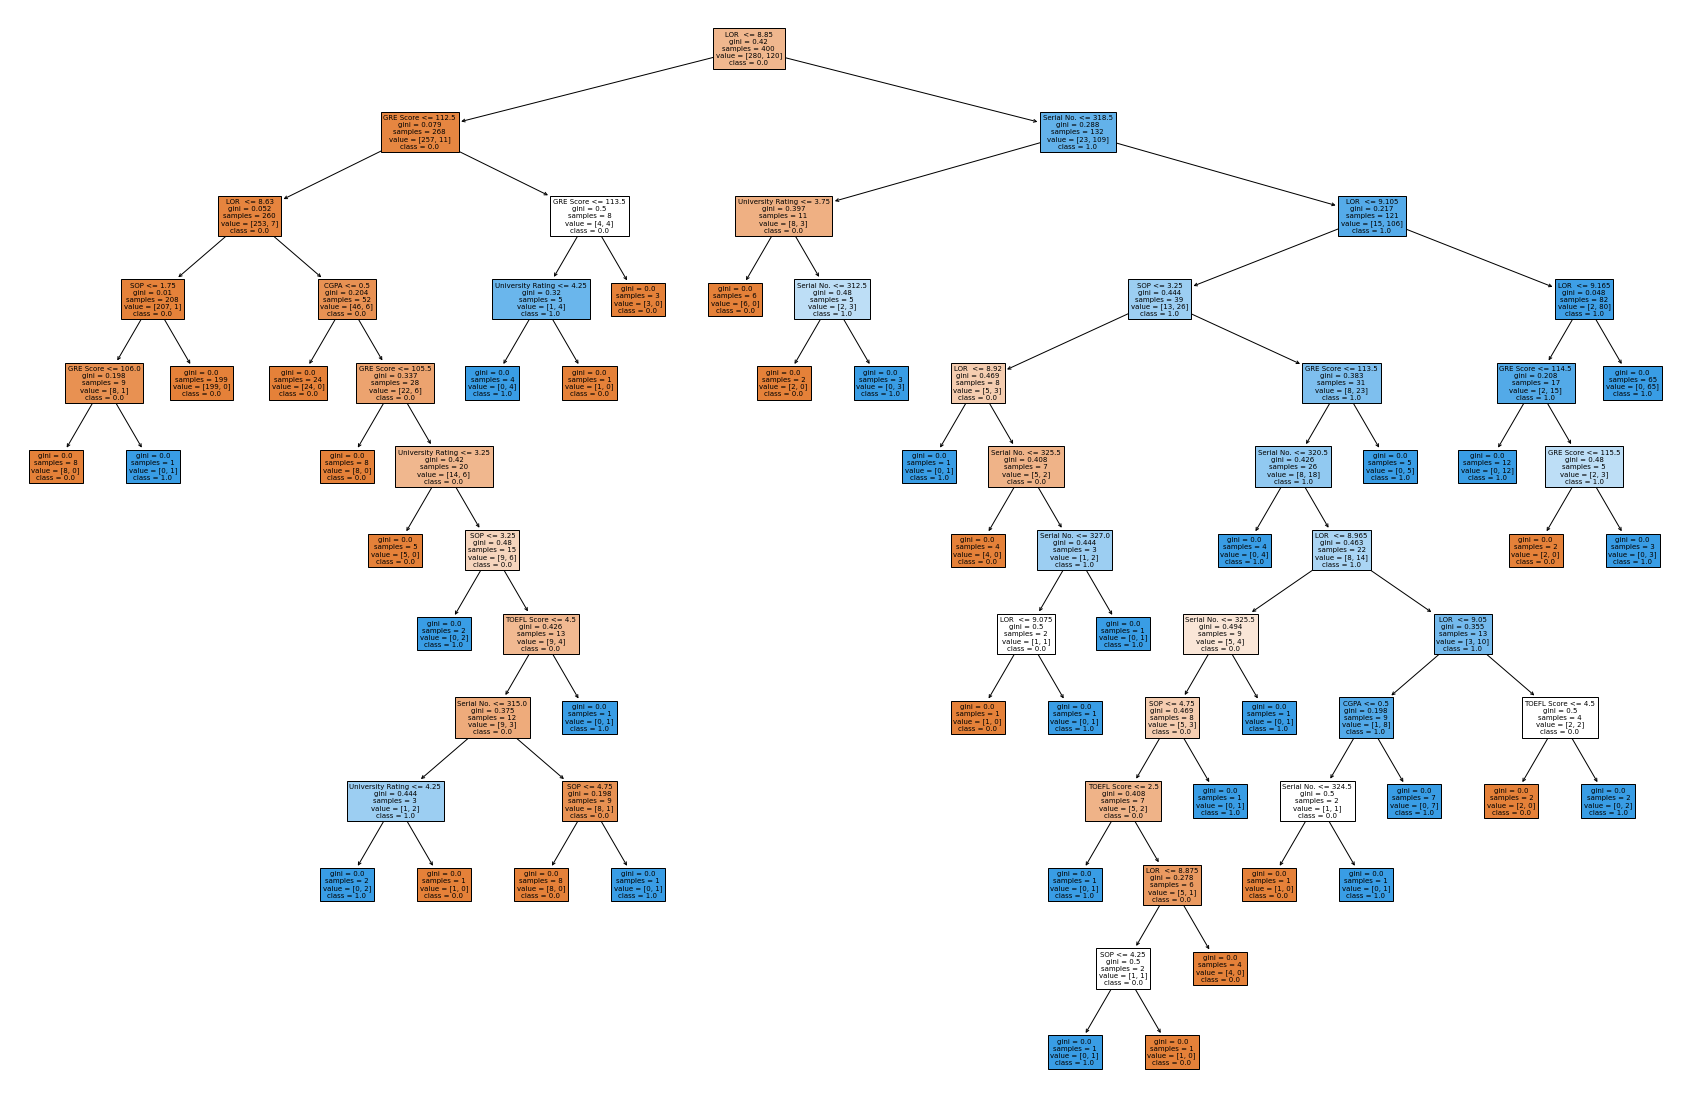

In [ ]:
#plot tree Plot a decision tree.
#The sample counts are weighted with any sample_weights that might be present.
#Use the figsize arguments of plt.figure to control the size of the rendering.
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(30,20))
plot_tree(model,feature_names = feature_names,class_names = class_names,filled= True)
plt.savefig('tree_visualization.png')

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.95
